In [1]:
%pylab inline
import pandas as pd
from datetime import date, timedelta

import matplotlib
matplotlib.rc('figure', figsize=(10, 5))

from scipy.optimize import curve_fit
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
start = date(2020, 3, 14)
df = pd.DataFrame([
    (97, 24, 22),
    (163, 33, 23),
    (252, 53, 31),
    (361, 79, 51),
    (496, 100, 66),
    (634, 130, 88),
    (837, 164, 114),
    (1089, 238, 167),
    (1380, 290, None),
    (1643, 322, None),
    (1859, 381, 242),
], columns=["hospit", "intensif", "respi"])
df['date'] = pd.Series(df.index).apply(lambda x: start + timedelta(days=x))
df['day'] = pd.Series(df.index) + 1
df = df.set_index("date")

In [3]:
df

,hospit,intensif,respi,day
date,,,,
2020-03-14,97,24,22.0,1
2020-03-15,163,33,23.0,2
2020-03-16,252,53,31.0,3
2020-03-17,361,79,51.0,4
2020-03-18,496,100,66.0,5
2020-03-19,634,130,88.0,6
2020-03-20,837,164,114.0,7
2020-03-21,1089,238,167.0,8
2020-03-22,1380,290,NaN,9


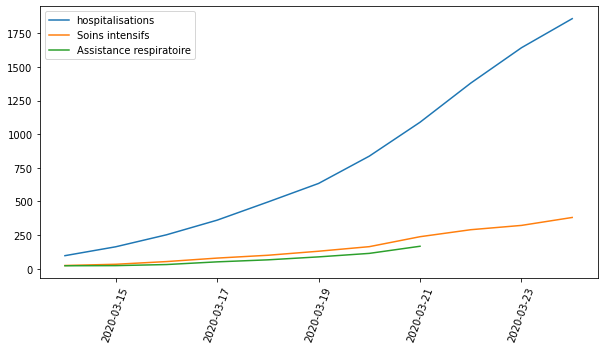

In [4]:
plt.plot(df.index, df.hospit, label="hospitalisations")
plt.plot(df.index, df.intensif, label="Soins intensifs")
plt.plot(df.index, df.respi, label="Assistance respiratoire")
plt.xticks(rotation=70)
plt.legend();

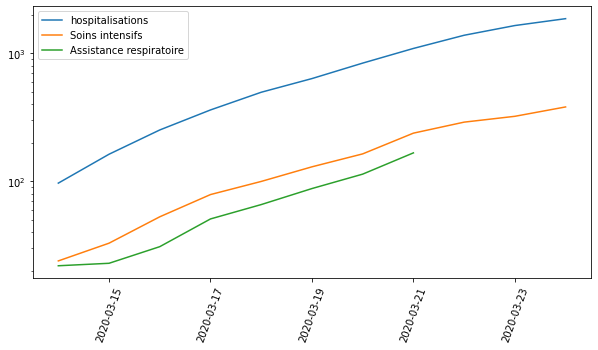

In [5]:
plt.plot(df.index, df.hospit, label="hospitalisations")
plt.plot(df.index, df.intensif, label="Soins intensifs")
plt.plot(df.index, df.respi, label="Assistance respiratoire")
plt.xticks(rotation=70)
plt.yscale('log')
plt.legend();

In [6]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df.day, np.log(df.hospit))
hospit_pred = np.exp(intercept + slope* df.day)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df.day, np.log(df.intensif))
intensif_pred = np.exp(intercept + slope* df.day)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df.dropna().day, np.log(df.dropna().respi))
respi_pred = np.exp(intercept + slope* df.day)

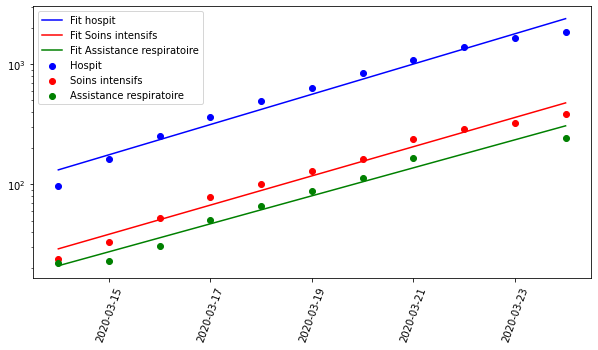

In [7]:
plt.scatter(df.index, df.hospit, label="Hospit", marker="o", color="b")
plt.plot(df.index, hospit_pred, label="Fit hospit", color="b")

plt.scatter(df.index, df.intensif, label="Soins intensifs", marker="o", color="r")
plt.plot(df.index, intensif_pred, label="Fit Soins intensifs", color="r")

plt.scatter(df.index, df.respi, label="Assistance respiratoire", marker="o", color="g")
plt.plot(df.index, respi_pred, label="Fit Assistance respiratoire", color="g")

plt.xticks(rotation=70)
plt.yscale('log')
plt.legend();

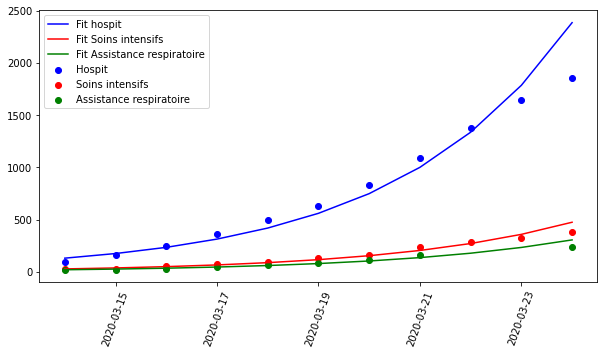

In [8]:
plt.scatter(df.index, df.hospit, label="Hospit", marker="o", color="b")
plt.plot(df.index, hospit_pred, label="Fit hospit", color="b")

plt.scatter(df.index, df.intensif, label="Soins intensifs", marker="o", color="r")
plt.plot(df.index, intensif_pred, label="Fit Soins intensifs", color="r")

plt.scatter(df.index, df.respi, label="Assistance respiratoire", marker="o", color="g")
plt.plot(df.index, respi_pred, label="Fit Assistance respiratoire", color="g")

plt.xticks(rotation=70)
plt.legend();

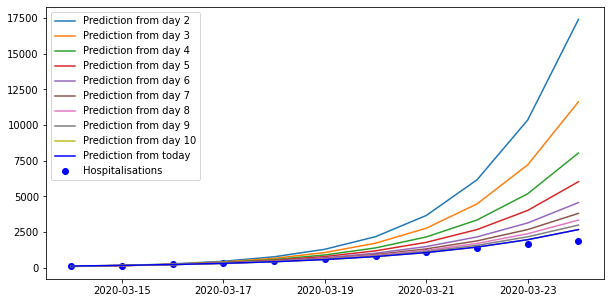

In [38]:
for i in range(2, len(df.day)):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df.day[:i], np.log(df.hospit[:i]))
    hospit_pred = np.exp(intercept + slope* df.day)
    plt.plot(df.index, hospit_pred, label=f"Prediction from day {i}")


plt.scatter(df.index, df.hospit, label="True hospitalisations", marker="o", color="b")
plt.plot(df.index, hospit_pred, label="Prediction from today", color="b")

plt.legend();

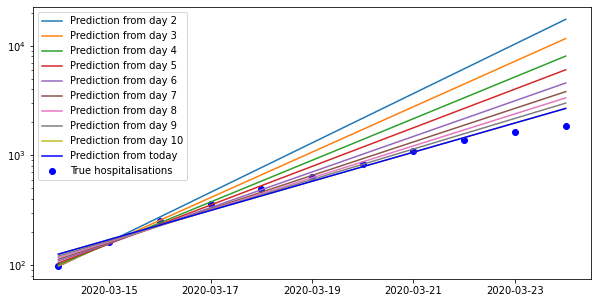

In [40]:
for i in range(2, len(df.day)):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df.day[:i], np.log(df.hospit[:i]))
    hospit_pred = np.exp(intercept + slope* df.day)
    plt.plot(df.index, hospit_pred, label=f"Prediction from day {i}")


plt.scatter(df.index, df.hospit, label="True hospitalisations", marker="o", color="b")
plt.plot(df.index, hospit_pred, label="Prediction from today", color="b")
plt.yscale('log')
plt.legend();

In [46]:
reg = pd.DataFrame([stats.linregress(df.day[:i], np.log(df.hospit[:i])) for i in range(2, len(df.day))], columns= ['slope', 'intpercept', "rvalue", "pvalue", "stderr"])

In [47]:
reg.slope.diff()

0         NaN
1   -0.041680
2   -0.039541
3   -0.031932
4   -0.032040
5   -0.021736
6   -0.016467
7   -0.014272
8   -0.015280
Name: slope, dtype: float64